# 2020 Finland Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns
import datetime as dt

import warnings
warnings.simplefilter('ignore')
import statsmodels.formula.api as smf

##  Some things explored
- initial exploration of cleaned datasets for happiness and cases in Finland
- different methods of visualizing happiness vs. cases data (daily, weekly, monthly, interpolated)

## Load cleaned csv's into df

In [2]:
finland_hap_filter = pd.read_csv('../data/cleaned_data/2020/finland_hap_cleaned.csv')
finland_cov=pd.read_csv('../data/cleaned_data/2020/finland_covid.csv')

In [3]:
finland_hap_filter

,Unnamed: 0,date,week,region,mental_health_condition,age,gender,happiness_rating
0,1008,2020-04-27,week 2,Etelä-Suomi,Yes,40,Male,5.0
1,1009,2020-04-27,week 2,Länsi-Suomi,No,43,Male,7.0
2,1010,2020-04-27,week 2,Etelä-Suomi,No,20,Female,8.0
3,1011,2020-04-27,week 2,Etelä-Suomi,No,52,Male,0.0
4,1012,2020-04-27,week 2,Etelä-Suomi,No,47,Male,7.0
...,...,...,...,...,...,...,...,...
15050,16058,2020-11-16,week 16,Pohjois- ja Itä-Suomi,No,72,Female,8.0
15051,16059,2020-11-16,week 16,Pohjois- ja Itä-Suomi,No,40,Male,4.0
15052,16060,2020-11-17,week 16,Pohjois- ja Itä-Suomi,Yes,60,Female,2.0
15053,16061,2020-11-17,week 16,Pohjois- ja Itä-Suomi,No,61,Female,8.0


In [4]:
finland_hap_filter.shape

(15055, 8)

<AxesSubplot:>

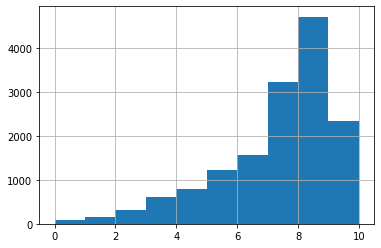

In [5]:
# Histogram to look at distribution
finland_hap_filter['happiness_rating'].hist()

In [6]:
finland_cov

,Unnamed: 0,Province/State,Country/Region,Lat,Long,date,cases
0,0,NaN,Finland,61.92411,25.748151,2020-01-22,0
1,1,NaN,Finland,61.92411,25.748151,2020-01-23,0
2,2,NaN,Finland,61.92411,25.748151,2020-01-24,0
3,3,NaN,Finland,61.92411,25.748151,2020-01-25,0
4,4,NaN,Finland,61.92411,25.748151,2020-01-26,0
...,...,...,...,...,...,...,...
312,312,NaN,Finland,61.92411,25.748151,2020-11-29,24629
313,313,NaN,Finland,61.92411,25.748151,2020-11-30,24912
314,314,NaN,Finland,61.92411,25.748151,2020-12-01,25462
315,315,NaN,Finland,61.92411,25.748151,2020-12-02,25882


In [7]:
finland_cov.shape

(317, 7)

In [8]:
finland_cov.describe()

,Unnamed: 0,Province/State,Lat,Long,cases
count,317.000000,0.0,3.170000e+02,3.170000e+02,317.000000
mean,158.000000,NaN,6.192411e+01,2.574815e+01,7339.955836
std,91.654242,NaN,5.693329e-14,1.636832e-13,5981.637589
min,0.000000,NaN,6.192411e+01,2.574815e+01,0.000000
25%,79.000000,NaN,6.192411e+01,2.574815e+01,2769.000000
50%,158.000000,NaN,6.192411e+01,2.574815e+01,7198.000000
75%,237.000000,NaN,6.192411e+01,2.574815e+01,8725.000000
max,316.000000,NaN,6.192411e+01,2.574815e+01,26422.000000


In [9]:
finland_cov = finland_cov[['date','cases']]
finland_cov

,date,cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
312,2020-11-29,24629
313,2020-11-30,24912
314,2020-12-01,25462
315,2020-12-02,25882


### Group COVID-19 cases by date

In [10]:
finland_cov['date'] = pd.to_datetime(finland_cov['date'])

In [11]:
finland_date_cov = finland_cov.groupby('date').sum()
finland_date_cov

,cases
date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-11-29,24629
2020-11-30,24912
2020-12-01,25462


Text(0, 0.5, 'Cases')

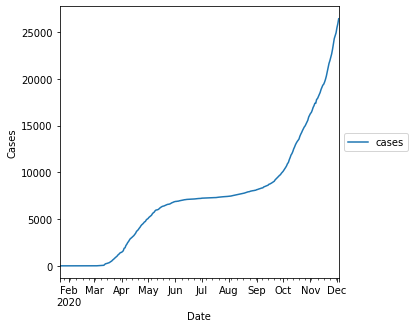

In [12]:
finland_date_cov.plot(kind='line',figsize=(5,5))
plt.legend(loc= 'center left', bbox_to_anchor=(1.0,0.5))
plt.xlabel('Date')
plt.ylabel('Cases')

### Observations

Looks similar to Denmark, increasing once again in Dec...reminds me of the regional analysis similarities

### Calculating daily changes in COVID-19 cases count

In [13]:
finland_date_cov['daily_change'] = finland_date_cov['cases'].diff()
finland_date_cov

,cases,daily_change
date,,
2020-01-22,0,NaN
2020-01-23,0,0.0
2020-01-24,0,0.0
2020-01-25,0,0.0
2020-01-26,0,0.0
...,...,...
2020-11-29,24629,322.0
2020-11-30,24912,283.0
2020-12-01,25462,550.0


In [14]:
finland_date_cov.to_csv('../data/exported_subset_data/covid/covid_finland.csv')

<AxesSubplot:xlabel='date'>

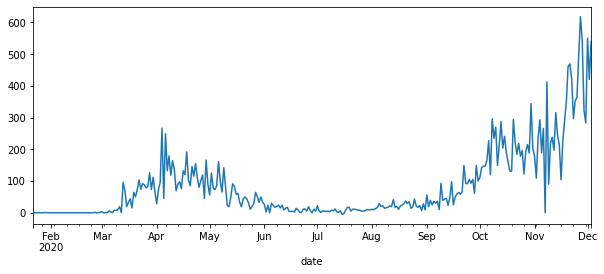

In [15]:
finland_date_cov['daily_change'].plot(figsize=(10,4))

### Observations
So we see two general spikes in cases, one spanning March-June and another that started around September and lasting until now. Let's see if happiness has any correlations with these surges.

### Group happiness ratings by date

In [16]:
finland_df=finland_hap_filter.groupby('date')['happiness_rating'].mean().reset_index()


In [17]:
finland_df['date'] = pd.to_datetime(finland_df['date'])

In [18]:
finland_date_cov.groupby('date').sum()

,cases,daily_change
date,,
2020-01-22,0,0.0
2020-01-23,0,0.0
2020-01-24,0,0.0
2020-01-25,0,0.0
2020-01-26,0,0.0
...,...,...
2020-11-29,24629,322.0
2020-11-30,24912,283.0
2020-12-01,25462,550.0


### Happiness ratings vs. COVID-19 daily case changes

<AxesSubplot:label='f7a40dc7-d1f3-41e2-adda-21279547341b'>

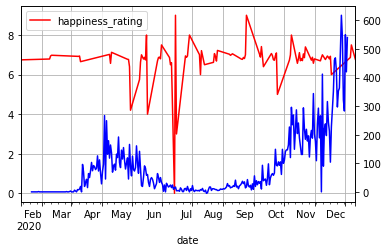

In [19]:
finland_df.plot(x='date', y='happiness_rating', color='red',grid=True)

cov= finland_date_cov.groupby('date')['daily_change'].sum()
cov.plot(x='date',y='daily_change', color='blue', grid=True, secondary_y=True)

### Observations
Similar problem with Denmark happiness 2020 dataset. Spiky and inconsistent data collection for happiness but COVID-19 cases are very precise and consistent.

In [20]:
finland_df['month_year'] = pd.to_datetime(finland_df['date']).dt.to_period('M')

### Monthly COVID-19 cases plotted with monthly happiness rating means


In [21]:
merged_df= pd.merge(left=finland_df, left_on='date',
         right=finland_date_cov, right_on='date')
merged_df

,date,happiness_rating,month_year,cases,daily_change
0,2020-02-09,6.787879,2020-02,1,0.0
1,2020-02-10,6.938776,2020-02,1,0.0
2,2020-02-11,6.978723,2020-02,1,0.0
3,2020-03-09,6.921305,2020-03,30,7.0
4,2020-03-10,6.939597,2020-03,40,10.0
...,...,...,...,...,...
86,2020-11-13,6.939560,2020-11,18858,316.0
87,2020-11-14,6.875648,2020-11,19102,244.0
88,2020-11-15,6.796791,2020-11,19315,213.0
89,2020-11-16,6.926471,2020-11,19419,104.0


<AxesSubplot:label='17bc15f0-21e1-4bff-a886-8da7a8546b8a'>

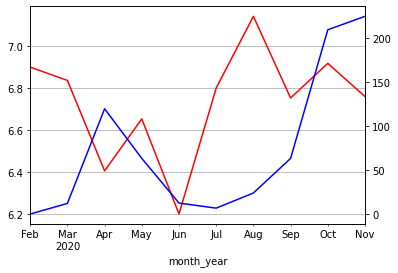

In [22]:
month_hap=merged_df.groupby('month_year')['happiness_rating'].mean()
month_hap.plot(color='red',grid=True)
month_cov=merged_df.groupby('month_year')['daily_change'].mean()
month_cov.plot(color='blue', grid=True, secondary_y=True)

### Observations
See some large patterns in that happiness and cases data mirror each other -- as cases increase, happiness decreases and vice versa. Peak in happiness ratings between July and August after close to no new cases in July.

In [23]:
finland_cov['week_number'] = finland_cov['date'].dt.week
finland_cov

,date,cases,week_number
0,2020-01-22,0,4
1,2020-01-23,0,4
2,2020-01-24,0,4
3,2020-01-25,0,4
4,2020-01-26,0,4
...,...,...,...
312,2020-11-29,24629,48
313,2020-11-30,24912,49
314,2020-12-01,25462,49
315,2020-12-02,25882,49


## Weekly happiness ratings and weekly COVID-19

In [24]:
weekly_covid= finland_date_cov.rolling(7).mean()

<AxesSubplot:xlabel='date'>

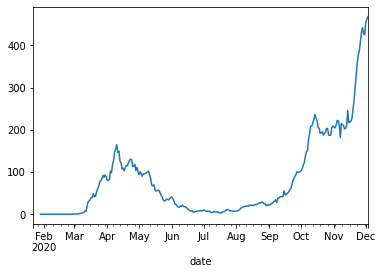

In [25]:
weekly_covid['daily_change'].plot()

In [26]:
hap_di = {
      'week 2': '2020-04-27',
      'week 3': '2020-05-13',
      'week 4': '2020-05-27',
      'week 5': '2020-06-09',
      'week 6': '2020-06-24',
      'week 7': '2020-07-08',
      'week 8': '2020-07-22',
      'week 9': '2020-08-06',
      'week 10': '2020-08-19',
      'week 11': '2020-09-02',
      'week 12': '2020-09-18',
      'week 13': '2020-10-02',
      'week 14': '2020-10-14',
      'week 15': '2020-10-28',
      'week 16': '2020-11-11',}
finland_hap_filter['week']= finland_hap_filter['week'].map(hap_di)  

In [27]:
finland_hap_filter['week'] = pd.to_datetime(finland_hap_filter['week'])

In [28]:
finland_hap_filter

,Unnamed: 0,date,week,region,mental_health_condition,age,gender,happiness_rating
0,1008,2020-04-27,2020-04-27,Etelä-Suomi,Yes,40,Male,5.0
1,1009,2020-04-27,2020-04-27,Länsi-Suomi,No,43,Male,7.0
2,1010,2020-04-27,2020-04-27,Etelä-Suomi,No,20,Female,8.0
3,1011,2020-04-27,2020-04-27,Etelä-Suomi,No,52,Male,0.0
4,1012,2020-04-27,2020-04-27,Etelä-Suomi,No,47,Male,7.0
...,...,...,...,...,...,...,...,...
15050,16058,2020-11-16,2020-11-11,Pohjois- ja Itä-Suomi,No,72,Female,8.0
15051,16059,2020-11-16,2020-11-11,Pohjois- ja Itä-Suomi,No,40,Male,4.0
15052,16060,2020-11-17,2020-11-11,Pohjois- ja Itä-Suomi,Yes,60,Female,2.0
15053,16061,2020-11-17,2020-11-11,Pohjois- ja Itä-Suomi,No,61,Female,8.0


<AxesSubplot:label='727427ee-e7e1-4581-811f-9269a84972cb'>

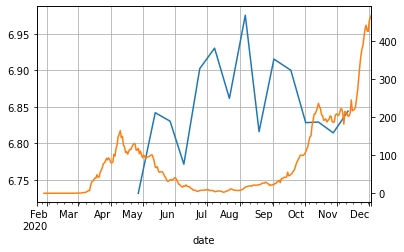

In [29]:
weekly = finland_hap_filter.groupby('week')['happiness_rating'].mean()
weekly.plot()
weekly_covid['daily_change'].plot(grid=True, secondary_y=True)

## Interpolated Happiness Ratings Finland

In [30]:
finland_df_daily=finland_df.set_index(pd.to_datetime(finland_df['date']))

In [31]:
finland_df_daily=finland_df_daily[['date', 'happiness_rating']]

In [32]:
finland_df_daily.to_csv('../data/exported_subset_data/happiness_2020/interpolated_finland.csv')

<AxesSubplot:label='421fb98c-042c-47b6-9f56-374eace5d948'>

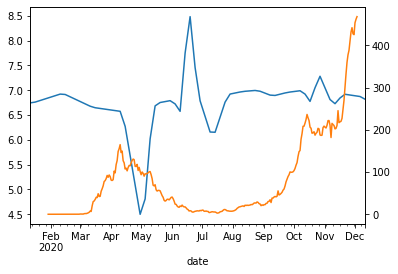

In [33]:
finland_df_daily.resample('5D').interpolate().rolling('10D')['happiness_rating'].mean().plot()
weekly_covid['daily_change'].plot(secondary_y=True)

### Observations
There are some matches between the two plots. Blue plot of happiness has major dip in May, which is shortly after first peak of cases in April. Happiness increases between Jun and July as cases remain low and controlled before returning to around the mean. Small dip again in October as 2nd wave starts, a little buffer region and cases are now starting to skyrocket once more in Dec. Happiness ratings may decline again? Interesting that the # of daily case changes is so low though (in the 100-400 region) which is much smaller compared that seen with Denmark. I would expect Finland's overall happiness to not decrease as much if these correlations do pan out.

## Happiness rating mean for 2020 as a whole in Finland

In [34]:
finland_hap_filter['happiness_rating'].mean()

6.852806376619063

Finland's happiness rating in 2019 was 7.78. Decrease in happiness rating in 2020.